### List files

In [171]:
from os import walk
fitsfiles = [] 
c = 0
for (dirpath, dirnames, filenames) in walk('./fitsfiles_images'):
    for file in filenames:    
        if(file.endswith('.fits')):
            fitsfiles.append(dirpath + '/' + file)
            print('{}: {}'.format(c, file))
            c += 1
    break

0: adapt41311_02e012_201905021200_i00005600n0.fits
1: vel_201905021200R000_agong.fits
2: wsa_201905020800R000_agong.fits
3: vel_201905021600R000_agong.fits
4: wsa_201905021600R000_agong.fits
5: wsa_201905021200R000_agong.fits
6: vel_201905020800R000_agong.fits
7: adapt41311_02e012_201905022000_i00025600n0.fits
8: wsa_201905022000R000_agong.fits
9: adapt41311_02e012_201905021600_i00005600n0.fits
10: vel_201905020000R000_agong.fits
11: adapt41311_02e012_201905020800_i00073600n0.fits
12: wsa_201905020000R000_agong.fits
13: vel_201905022000R000_agong.fits


## Choose file to look at

In [203]:
im_index = 11 # Change here
print('Chosen image: {}'.format(fitsfiles[im_index]))

Chosen image: ./fitsfiles_images/adapt41311_02e012_201905020800_i00073600n0.fits


#### View header information

In [204]:
from astropy.io import fits

hdu_index = 0 # 0 is PrimaryHDU

file = fitsfiles[im_index]
fitsimage = fits.open(file)
fitsimage.info()

image_data = fitsimage[hdu_index].data 
fitsimage.close()
print()

fitsimage[hdu_index].header

Filename: ./fitsfiles_images/adapt41311_02e012_201905020800_i00073600n0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   (360, 180, 12)   float32   
  1  ensemParmInfo    1 BinTableHDU     45   12R x 12C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  2  ensemStatInfo    1 BinTableHDU     36   12R x 9C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  3  ensemStatInfo2    1 BinTableHDU     36   12R x 9C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  4  STDDEV        1 ImageHDU         9   (360, 180)   float32   



SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  360 / length of data axis 1                          
NAXIS2  =                  180 / length of data axis 2                          
NAXIS3  =                   12 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
ADD_DATE=             20190502 / Date for new map                               
ADD_UT  =                   8. / UT for new map                                 
LASTSITE=                    3 / Last obs site: Big Bear (GONG)                 
LAST_OBS=            0.3166667 / Days since last obs merged                     
LAST_RND=            0.1666667 / Time since random flux merged                  
NEVODAYS=             9845.4

In [205]:
from astropy.time import Time 

time = Time(2458605.83333333, format='jd')
time.isot

'2019-05-02T08:00:00.000'

### Choose layer
What are the layers anyway??

In [193]:
print('Dimensions for HDU No. {}: {}'.format(hdu_index, image_data.shape))
if(len(image_data.shape) == 3):
    layer_index = 1 # change here
    print ('Image has three dims. Chosen layer index: ' + str(layer_index))
    image = image_data[layer_index,:,:]
elif(len(image_data.shape) == 2):
    print('Image has two dims.')
    image = image_data
else: 
    print('Hmm what is this data')

Dimensions for HDU No. 0: (7, 90, 180)
Image has three dims. Chosen layer index: 1


#### Plot image

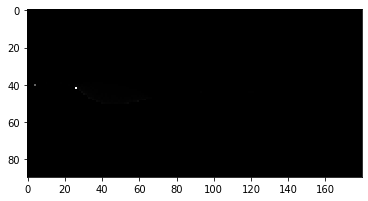

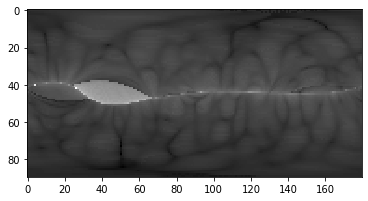

In [194]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.imshow(image, cmap='gray')
plt.pause(.1)
plt.imshow(image, cmap='gray', norm=LogNorm())

##### Trying to see some difference between the layers of the magnetogram files

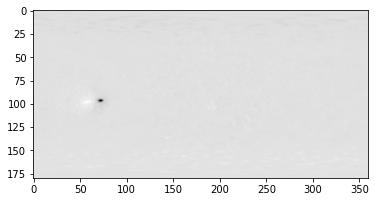

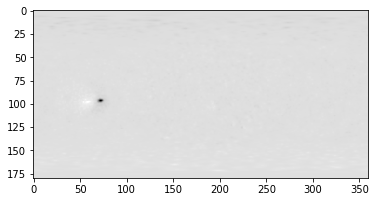

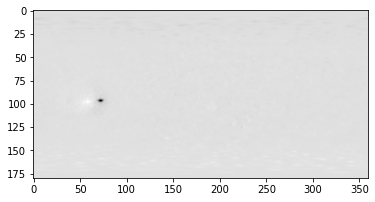

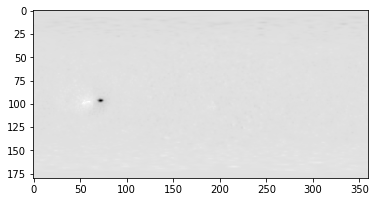

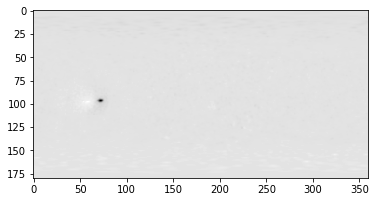

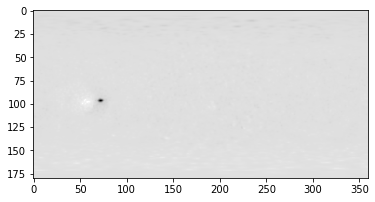

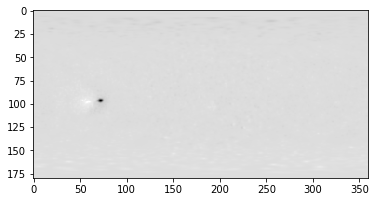

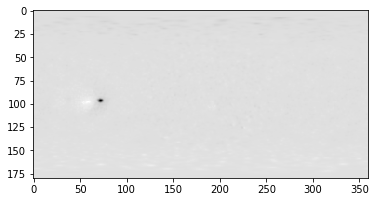

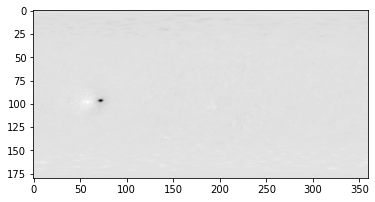

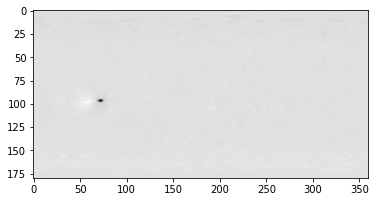

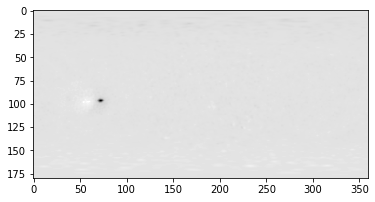

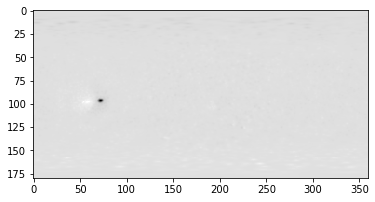

In [176]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

adapt_image = fits.getdata(fitsfiles[11])

for i in range(adapt_image.shape[0]):
    plt.imshow(adapt_image[i,:,:], cmap='gray') #, norm=LogNorm())
    plt.pause(.1)